## **AVERY BOLAND MATH215 FINAL - Examination of the 2D Ferromagnetic Lenz-Ising Model**

Sections:
1) Overview and Mathematical background
2) Exact Solution and Monte Carlo Method for Solution
3) Code



## **Section 1: Overview and Mathematical Background**

In this project, I explored the ferromagnetic ising model and both solved it, and approximated it in python. I created a visualization to show the evolution of the Metropolis-Hastings algorithm, and to sample a number of measurements to display the behavior of the model. Additionally I employed Numba - a python modules used to drastically speed up my code, this overcame the main challenge i faced which is the sheer number of computations required for the model to converge. This is discussed further in the optimizations section of my code

**Introduction:**


The Ising or Lenz-Ising model is a model used to study the magnetic behavior of materials. In most contexts - and this project - the Ising Model refers specifically to the ferromagnetic version of this which models ferromagnetic material which is defined by having its electrons tend to allign in a given temperature range. The 2D version of this model was solved exactly by Lars Onsager in 1944 for a model with no external magnetic field. A number of thermodynamic quantities can be ascertained from this models' exact solution, but as I will demostrate are very hard to find explicitly so an estimatory approach is taken. This model is widely used to study phase transitions, which are present in models in 2 dimensions and above as proved by Ising in his PhD thesis. 


**The 2D Model:**

The model consists of a lattice of spin configurations. Each one of these sites may take on a value of +1 or -1 corresponding to a spin of down or up. Between nearest neighbor spins there is an interaction energy ($J_i$ and $J_j$) which describe how neighboring spins interact. When J>0 the material is ferromagnetic and the spins will tend to allign due to a force present between neighboring spins. When neighboring spins are not alligned in a ferromagnetic material, the force is present across a larger distance which can be thought of as a higher "potential energy" thus the spins tend to allign as the model moves towards the lowest energy state to satisfy the 2nd law of thermodynamics.

The energy for this model is expressed:
${\displaystyle H(\sigma )=-\sum _{\langle ij\rangle }J_{ij}\sigma _{i}\sigma _{j}-\mu \sum _{j}h_{j}\sigma _{j},}$


Where:


$H(\sigma ) $ is the Hamiltonian representing the sum of all individual energies


${⟨ i j ⟩}$ is all of the nearest neighbor interactions

$\mu$ is the magnetic moment

h is the external magnetic field

$\sigma_{i}$  and  $\sigma_{j}$ are the individual sites on the lattice

Simplifications:
The exact solution of the model had no external field so estimations usually reflect this. Further, in simulations we often assert $J_i$ = $J_j$ = $J$. This simplifies the energy expression down to:

${\displaystyle H(\sigma )=-J\sum _{\langle i~j\rangle }\sigma _{i}\sigma _{j}.}$

*The model is also evaluated under periodic boundary conditions, so $\sigma_{N+1}$ = $\sigma_1$ and $\sigma_0$ = $\sigma_N$



## **Section 2 Exact Solution and Monte Carlo Method for Approximation**

Motivation - The exact solution for various thermodynamic properties is relatively easy to express using partial derivatives with respect to different variable. There are multiple forms of this solution, but the set of equations below can accuarately describe the model in 2D at the thermodynamic limit, with no external magnetic field:
$$
A = -k_B T \ln Z
$$

$$
Z = \lambda^N
$$

$$
\ln \lambda = \ln(2\cosh 2\beta J) + \frac{1}{\pi} \int_0^{\pi/2} \mathrm{d}w \ln \left[ \frac{1}{2} \left(1 + (1 - K^2 \sin^2 w)^{1/2}\right) \right]
$$

$$
K = \frac{2\sinh 2\beta J}{(\cosh 2\beta J)^2}
$$

Where:

$k_b$ = Boltzman Constant

A = the Hemholtz free energy 

T = Temperature in Kelvin

$\beta$ = Inverse Temperature = $\frac{1}{(k_bT)}$

N = # of lattice sites

Z = The partition function = ${\displaystyle Z_{\beta }=\sum _{\sigma }e^{-\beta H(\sigma )}}$

Furthermore, we can express various thermodynamic properties of the system using the first and second partial derivatives of $Z$ with respect to $\beta$:

$E = -\frac{\partial \ln Z}{\partial \beta} = -N \frac{\partial \ln \lambda}{\partial \beta}$

This represents the internal energy of the system as a function of inverse temperature. When you graph this function, you can clearly see the phase transition. 


Additionally we have:

$$C_V = \frac{\partial E}{\partial T} = -\frac{1}{k_B T^2} \frac{\partial E}{\partial \beta} = \frac N {k_B T^2} \frac{\partial^2 \ln \lambda}{\partial \beta^2}$$

Where $C_V$ may go by many names though originally: specific heat. In general specific heat is defined as the partial derivative of heat (~thermal energy) with respect to temperature which results 
in a value that tells us how much heat energy must be put into a system to change the temperature by 1 degree. It can also be referred to as susceptability, ie. how susceptable as system is to change temperature based on energy. On the graph of this function (below), you can see the $C_V$ peaks at the critical temperature suggesting that it takes a lot more energy to push the system up in temperature at the critical point (because the energy is going towards creating disorder). Another name that $C_V$ can go by specifically in terms of the Ising model is correlation - how far away a single spin flip can affect other spins. This is one of the key traits that has led to a leading theory in neuroscience called brain criticality which states that the brain operates at a critical state because it allows for the most effective long range communications. This theory turns out to likely be true because, in some regards, the brain behaves very similar to the Ising model at the critical temperature - but this is to be further explored later. 

Another relationship found is:

$${\displaystyle \sinh \left({\frac {2J_{1}}{kT_{c}}}\right)\sinh \left({\frac {2J_{2}}{kT_{c}}}\right)=1}$$ 

Where the T that satsifies this equation is the critical temperature. However, when $J_i = J_j$ the expression simplifies to: 

$$
k_B T_c = \frac{2J}{\ln(1 + \sqrt{2})} = 2.69... J
$$

I coded this and found it to be:  $ 2.269185314213022 J$


In addition to this though, we want to find possible states that the lattice might be in at a given temperature. To do this we can sample from a known probability distribution: the cannonical distribution. For the Ising model the distribution is

$$
{\displaystyle P_{\beta }(\sigma )={\frac {e^{-\beta H(\sigma )}}{Z_{\beta }}}}
$$
  

Which depends on the partition function:

$$
{\displaystyle Z_{\beta }=\sum _{\sigma }e^{-\beta H(\sigma )}}
$$
  
The issues arises however when examining the partition function where you find that it is basically impossible to compute for anything but miniscule values of N. This makes it near impossible to actually find a possible configuration of the lattice. To get past this issue, we use a well know Markov Chain Monte Carlo Method: The Metropolis-Hastings Algorithm. This algorithm basically proposes a series of randomly selected single spin flips  - which generte a distinct lattice configuration, and then compares the energy of the new and old lattice. What this does is move the starting lattice (which is random) towards the equilibrium state of the lattice at a given temperature, which will eventually satisfy the cannonical distribution.


**Metropolis Hastings Algorithm:**
1) Pick a random site on the lattice with probability $\frac1L$ where $L = n*n$
2) Propose a new lattice state by flipping that lattice site
3) Evaluate the energy of the lattice
4) If the new energy is lower - accept the flip
5) If the new energy is not lower - accept the flip with probabiltiy $e^{-{\beta}(H_{\nu}-H_{\mu})}$ 

## **Section 3 Code:**

**(Non-Standrard) Modules Used:**

**Numba**: Numba is a module used for high performance computing with python. It is a just-in-time complier (JIT) that converts python functions into assembly at runtime thus speeding them up (more later). The @NJIT decorator was used extensively in this project which stands for "No Python JIT". These functions may only use standard loops and a few basic numpy operations. Input and output types are annotated, and the types used are custom types made by Numba and are distinct from native python types or numpy types. The Global Ingterpreter Lock is also turned off which allows multithread processing without having to set it up using threading module or something similar.



**Pygame**: Pygame is a very powerful and easy to use module focused on making games. It allows for very minimal syntax to generate the grid used for visualization and is very quick to update the grid for each frame.

**Pygame GUI**: Additional presets for pygame. I used this for the slider to adjust BetaJ



**Exact Solution Code**

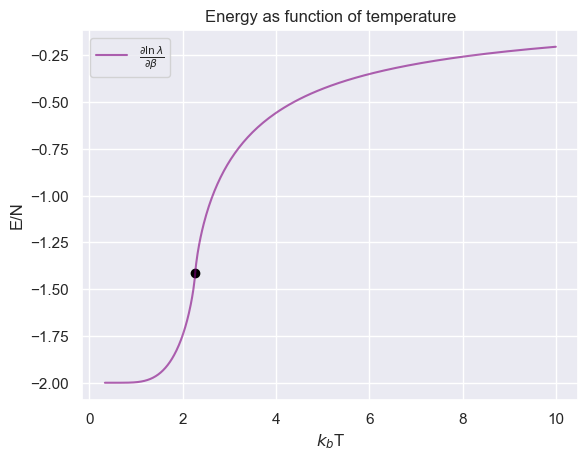

In [8]:
"""Code for the exact solution and some partial derivatives as given in the math section"""

import scipy as sp
import numpy as np

J = 1

def lnlam(beta): # function of log of lambda according to equations defined above
    term1 = np.log(2 * np.cosh(2 * beta * J))
    
    K = (2 * np.sinh(2 * beta * J)) / ((np.cosh(2 * beta * J))**2)
    
    integrand = lambda omega: np.log(.5 * (1 + np.sqrt(1 -  (K**2 * np.sin(omega)**2) ) ) )
    
    integral_val, error = sp.integrate.quad(integrand, 0, (np.pi/2))
    
    return term1 + ((1/np.pi) * integral_val)


def lam(beta): # function for lambda
    return np.exp(lnlam(beta))


beta = np.linspace(0.1, 3, 1000)

def first_deriv(f, param, h=1e-5): # central difference formula to find the 1st partial derivative
    return (f(param+h) - f(param-h)) / (2 * h)

y  = -np.array([first_deriv(lnlam, kbt) for kbt in beta]) 


plt.plot(1/beta, y, color = "purple", alpha=.60)
plt.legend([r'$\frac{\partial \ln \lambda}{\partial \beta}$'])
plt.scatter(2.269185314213022,first_deriv(lnlam, -1/2.269185314213022), color="black")
sub = "b"
plt.xlabel(fr"$k_{sub}$T")
plt.ylabel("E/N")
plt.title("Energy as function of temperature")

#plt.savefig("dlnldbvkbt.png")

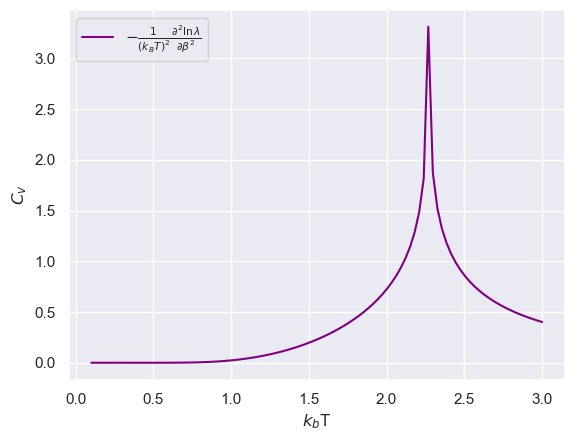

In [13]:
beta = 1/np.linspace(.1, 3, 100)

def second_d(f, param, h=1e-5):
    return (f(param + h) - 2 * f(param) + f(param-h)) / h**2

y = -np.array([second_d(lnlam, beta) for beta in beta])

plt.plot(1/beta, -y*beta**2, color="Purple")
plt.legend([r'$-\frac{1}{(k_B T)^2} \frac{\partial^2 \ln \lambda}{\partial \beta^2}$'])

sub = "b"
plt.xlabel(fr"$k_{sub}$T")

subb = "v"
plt.ylabel(fr"$C_{subb}$")
plt.show()

kbT ======>  1
Graphic Mode or Statistic Mode (G/S) ======>  g


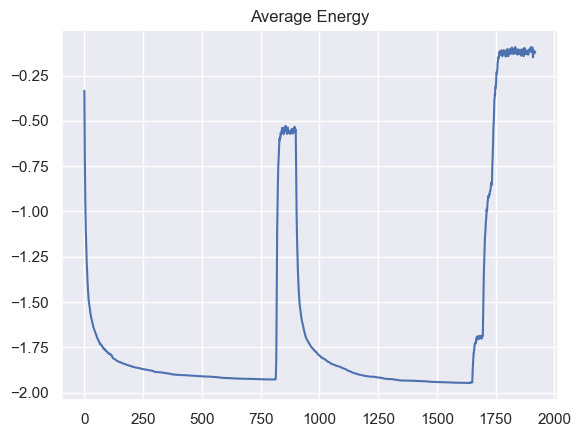

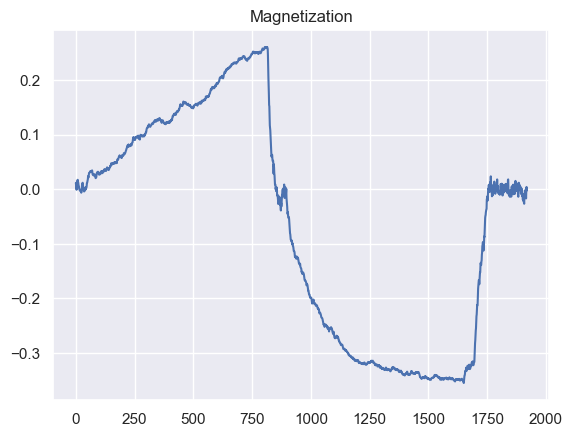

In [18]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pygame
from numba import njit, int32, float64
import time
from IPython.display import display, clear_output
import pygame_gui
import seaborn # Make it pretty
seaborn.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)


"""GLOBAL VARIABLES"""
kb = 1.380649e-23 # boltzman constant
n = int(128) # Dimension of lattice
kbT = float(input("kbT ======> "))
"""
Determines how the model will behave, this is the standard input for all codes I examined while working on this project as it both avoids overflow 
errors due to the magnitude of beta, and displays many different behaviors in a smaller range of inputs.
(0, ~2.69] - ordered state
~2.69 - Crititcal point
>2.69 - Ordered state
"""
L = n * n # total number of sites
J = 1 # interaction energy
#beta = 1 / (kbT*J) #thermodynamic beta
THRESHOLD = 1e-3 # used for detecting convergence
lattice = np.random.choice(np.array([-1,1]), (n,n)) # Starting random lattice. Note, here is another example of changing code for Numba, the choices 
#have to be given as a numpy array insted of a tuple like we would normally do because Numba cannot interpret a tuple.


"""Pad takes in the entire lattice and implements the periodic boundary conditions"""
#FIXME  - TALK ABOUT NUMBA TYPE ANNOTATION
@njit("int32[:, :](int32[:, :])", nogil=True)
def pad(latt): #
    padded = np.empty((n+2,n+2), dtype=int32)
    padded[1:-1, 1:-1] = latt
    #top of pad = bottom of latt and vice verse
    padded[0, 1:-1] = latt[-1, :] #first row, all columns of padded (top) = last row, all colums of lattice (vottom)
    padded[-1, 1:-1] = latt[0, :] #law row, all columns of pdded (bottom) = first row, all columns of ltt (top)
    #left of pad = right of latt and vice versa
    padded[1:-1, 0] = latt[:, -1] #1-all rows of padded, first columns (left) = all rows, last column of latt (right)
    padded[1:-1, -1] = latt[:, 0] #all rows of padded, last column (right) = all rows, first column of latt

    return padded


"""Calculate the Hamiltonian of a lattice - I called the variables to_conv and convolved due to the fact that this
was originally implemented using scipy.signal.convolve2d(), however this function is not supported by Numba which was
the motivation for making the function below. 

The function takes in lattice, calls pad() to apply periodic boundary conditions, and then loops through each element of the 
array and sums up the nearest neighbors. The array storing all of the nearest neighbor sums is then totally summed up and multiplied
by -J (according to the formula in section 1) """

@njit("int32(int32[:,:])", nogil=True)
def full_energy(latt):
    to_conv = pad(latt) # Call pad() defined above
    convolved = np.empty((n,n), dtype=int32) # make empty array to store values of nearest neighbor sums
    
    for i in range(1, n+1): # loop through all lattice sites
        for j in range(1, n+1): 
            convolved[i-1, j-1] = to_conv[i-1, j] + to_conv[i, j-1] # apply nearest neighbor sum
            
    return -J * np.sum(convolved * latt, dtype=int32) #Sum array according to hamiltonian, notice int32 which is a Numba type


"""Flip a random point in the lattice according to the first step of the metropolis algorithm"""
@njit("int32[:, :](int32[:, :])", nogil=True)
def flip_point(latt): # flip a random point in the lattice
    point = np.random.randint(0, n, (2))# select random point
    latt[point[0], point[1]] *= -1 # flip it to opposite spin
    return latt # return whole lattice


"""Run one cycle of the Metropolis algorithm"""
@njit(nogil=True) 
def step(latt, Hu, beta=(1/kbT)): #Takes in current lattice state and current beta if beta changes which it does in graphics function 
    test_latt = np.copy(latt) # copy since we don't know if we will accept changes
    flipped = flip_point(test_latt) # propose flip
    Hv = full_energy(flipped) # find energy

    if Hv < Hu: # immediately accept if energy is lower
        return flipped, Hv
    else: # Conditional acceptance check
        flip = np.random.rand() < np.exp(-beta * (Hv - Hu)) 
        if flip:
            return flipped, Hv
        else:
            return latt, Hu
        




"""GRAPHICAL DISPLAY - Visualizes the progressions of the algorithm - this does NOT represent the behavior of the system over time, only the evolution
of the algorithm
"""

"GLOBAL VARIABLES"

"""
kbT:
Determines how the model will behave, this is the standard input for all codes I examined while working on this project as it both avoids overflow 
errors due to the magnitude of beta, and displays many different behaviors in a smaller range of inputs. This is opposed to inputting a temperature alone
(0, ~2.69] - ordered state
~2.69 - Crititcal point
>2.69 - Ordered state
"""

#Colors including some pretty alternatives
down_color = (63, 81, 181)         #(0, 188, 212)#(63, 81, 181) #(102, 51, 153)
up_color = (233, 30, 99)              #(255, 87, 34)#(233, 30, 99)#(255, 128, 0)

LATTICE_LEN = 600
adj = .05


WINDOW_LENGTH = 720
CELL_SIZE = int(round(LATTICE_LEN/(n))) # scaled down a little bit to make sure cells overlap, also want to 
TICK_SPEED = 10000
spf = 5000 #step per frame update


time_el = 0

energies = []# will store energies for plotting
magnets = []



"""Draws cells according to lattice"""
def draw_cells(n, latt):
    for y in range(n):
        for x in range(n):
            if latt[x, y] == -1:
                color = down_color
            else:
                color = up_color
            
            pygame.draw.rect(screen, color, (x * CELL_SIZE, y * CELL_SIZE, CELL_SIZE, CELL_SIZE), width=0) # width<0 nothing drwn
            
            
"""Main pygame function, this is called when graphic mode is selected"""
def main(lattice):
    epsilon = 1e-6
    pygame.init()#init pygame

    window_size = (LATTICE_LEN, LATTICE_LEN * (1.1)) # set window size
    screen = pygame.display.set_mode(window_size)
    pygame.display.set_caption('My CPU Hertz')

    manager = pygame_gui.UIManager(window_size) # make ui manager same size as pygame screen, seperate entity but works on screen
    #Pygame.rect(left, top, width, right)
    slider = pygame_gui.elements.UIHorizontalSlider(relative_rect=pygame.Rect(-4, 635
                                                    , LATTICE_LEN+10, LATTICE_LEN+10),
                                                    start_value=1,
                                                    value_range=(0, 25),
                                                    manager=manager)
    # make/position slider, i dont know why the corrdinates eneded up so weird (-4???) but I added this last minute and just adjusted til it worked 
    #im sure I was doing something wrong but it is good enough for the demo

    clock = pygame.time.Clock() # init clock 
    running = True
    H = full_energy(lattice)

    while running:
        dt = clock.tick(200) # max framerate = 200

        for event in pygame.event.get():  # handle window closing 
            if event.type == pygame.QUIT:
                running = False
           


        manager.process_events(event) # manager also needs to know what event is happening

        beta = (1 / (slider.get_current_value() + epsilon) ) * J # get betaJ from slider value

        manager.update(dt) # update manager at same time as main pygame clock 


        screen.fill((255, 255, 255)) # clear screen

        try:
            draw_cells(n, lattice)  #draw cells from lattice
        except Exception as e:
            print(e)
            pygame.quit()
            break

        for i in range(spf): # take a number of steps (spf = steps per frame)
            lattice, H = step(lattice, H, beta)

        energies.append(H) # store data
        magnets.append(np.sum(lattice)/(n*n))
        
        manager.draw_ui(screen) # draws slider

        pygame.display.update() # displays cells

    pygame.quit() # quit when loop breaks

    #print(energies[-1], time)

    enot = np.array(energies)/(n*n) # avg energy
    tspace = np.linspace(0,len(energies), len(energies)) # x axis for plots

    plt.figure(1)
    plt.plot(tspace, enot)
    plt.title("Average Energy")
    
    plt.figure(2)
    plt.plot(tspace, magnets)
    plt.title("Magnetization")
    




"""Statistics Function:
Runs the Metropolis algorithm with very rudimentary convergence detection

Collects a bunch of data from each sample. Total energy, energy per site, slope of linear regression of energy change, 
magnetization (average spin) -> Will eventually use these to build a number of graphs

This function is used to demonstrate behavior at a speciifc temperature, and runs until equilibrium. It will also measure convergence time, which
changes depending on how close the model is running to the critical temperature.

"""

lattice = np.random.choice(np.array([-1,1]), (n,n)) 

def runner(latt):
    start = time.time()
    step_count = 0 # used to keep track of cycles
    step_steps = [] # used as the x-axis in plots and reflects sampling rate
    energies = [] # stores energies per site 
    changes = [] # stores chnages in energy
    increase = [] # stores when energy increases
    tot_nrgs = [] # stores total energies
    mags = [] # stores magnetism
    slopes = [] # stores slopes of moving average window
    sps = 5000 # steps per second, not actually per seconds, just a sampling rate
    H = full_energy(latt) # initialize energy
    # window_avg = 1000 # sets length of window to find moving average, used in convergence detection
    # #L = n*n
    #L = n
   # color = "#7209b7"
    
    try:
        slope = 1 # initialize the slope
        old = 0 # initialize the previous energy
        H = full_energy(lattice) # initialize current energy
        while True:
            step_count += 1 # incremenet step
            clear_output(wait=True) # wait for new output before clearing previous output (for display module)
            old = H # previous energy
            tempx = [i for i in range(sps)] # tempory x range to find average in a recent window
            tempy = [] # will store y values temporarily
            for i in range(sps): # take a certain number of steps
                latt, H = step(latt, H) # call step
                tempy.append(H) # append energy to moving window
            slope = np.polyfit(tempx, tempy, 1) # linear regression of the energy (when this slope is minimal, simulation represents real system at equilibrium)
            slopes.append(slope[0]) # slope[0] = actual slope value, want to store these for plotting
            print("Avg Energy:", H/L, "Slope",slope[0])# display avg energy per site, and slope of window
            #if H/L < (-3.5):
            energies.append((H/L)) # store energy per site
            tot_nrgs.append(H/J) # store Total energy
            step_steps.append(step_count*sps) # increment x-axis
            changes.append(H/L - old/L) # store changes
            mags.append(np.sum(latt)/L) # store magnetism

            if H > old:# store increases
                increase.append(step_count*sps)
                
            if abs(np.mean(slopes[-500:])) < THRESHOLD: # convergence detection, threshold is near 0, so this means energy is no longer changing significantly
                #print(abs(np.mean(slopes[-500:])))
                break

            old = H # old energy
            time.sleep(0.000005) # 

 

    except KeyboardInterrupt:
        print("KEYBOARD INTERRUPT")
        



    finally:
        conv_time = time.time() - start
        print(f"""
        ========================================================
        CONVERGENCE DATA:
        + Steps per sample: {sps}
        + {step_count*sps} total cycles
        + {chr(946)} = {1/kbT}
        + Moving Slope Window: 1000
        + Mean of last 500 slope samples: {np.mean(slopes[-500:])}
        + Threshold: {THRESHOLD}
        + Time to converge: {conv_time}
              """)
        
        plt.figure(1)
        plt.title("ENERGY CHANGE PER SITE")
        plt.xlabel("Steps")
        plt.scatter(step_steps, changes, s=1)
        plt.plot(step_steps, changes, color="#7209b7")

        plt.figure(2)
        plt.title("ENERGY PER SITE")
        plt.xlabel("Steps")
       # plt.grid()
        plt.plot(step_steps, energies, color="#f72585")
        
        plt.figure(3)
        plt.title("MAGNETISM")
        plt.xlabel("Steps")
        plt.ylabel("Order")
      #  plt.grid()
        plt.plot(step_steps, mags, color="#3a0ca3")
        
        plt.figure(4)
        plt.title("ENERGY")
        plt.xlabel("Steps")
        plt.ylabel("Energy")

       # plt.grid()
        plt.plot(step_steps, tot_nrgs, color="#4cc9f0")

        plt.figure(5)
        plt.title("SLOPE OF ENERGY CHANGE")
        plt.ylabel("Slope")
        plt.xlabel("# Samples")
       # plt.grid()
        plt.plot(step_steps, slopes, color="#d00000")
        
        plt.show()
        plt.axis("off")
        plt.imshow(latt)
        
        #np.save("atcrit.npy", latt)
        
        #print(time.time() - start)
        

if __name__ == "__main__":
    # kbT = float(input("kbT ======> "))
    mode = input("Graphic Mode or Statistic Mode (G/S) ======> ")
    if mode.lower() == "g":
        # pygame.init()# Start pygame
        # pygame.display.set_caption("My CPU Hertz") # for funziez
        screen = pygame.display.set_mode((WINDOW_LENGTH, WINDOW_LENGTH)) # Initialize screen object to draw on
        # clock = pygame.time.Clock() # inititalize clock
        main(lattice)
        
    else:
        runner(lattice)
        
    

    
        


**Optimizations:**


The main algorithm was tested with and without Numba and results are as follows:

======================================================================================================================================================
1.69 ms ± 45 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each) --- Per Monte Carlo cycle - just python and numpy


269 µs ± 17.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each) --- Per Monte Carlo Cycle - First implementation using numpy and scipy


5.93 µs ± 62.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each) --- Per Monte Carlo cycle - Addition of NJIT decorator, turning global inerprater lock off, and annotating input and output types.


======================================================================================================================================================

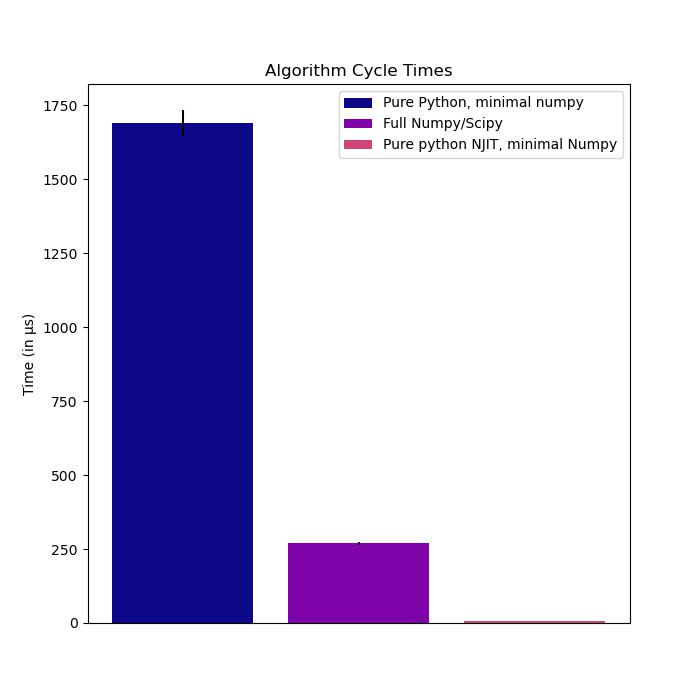


A simple glance at my code may suggest that further optimization is needed - this is due to the way that Numba is set up. The first time a function is called with Numba, it is compiled down to machine code and stored in a cache. Since there are so many layers of abstraction in between python and machine code, you can only used very basic operations. The NJIT decorator is specifically called the no-python JIT, which as may be obvious, does not accept python specific things, such as python data types like tuple() or list(), which is a result of the code not using the python C-API (which is why this is the fastest option). Additionally, Numba is made to work with NumPy, however it can only use very basic functions like array manipulations and very basic operations like sums. While NumPy and SciPy are very well optimized for numerical work, it is clear that Numba is much faster than even these libraries, despite having code that is inherently more convoluted (from the reference point of python syntax). To quantify the results in the figure, the Numba code is ~285x faster than basic python, and ~45x faster than a NumPy/SciPy approach.

## **SOURCES**

https://en.wikipedia.org/wiki/Ising_model

https://en.wikipedia.org/wiki/Ising_model#Monte_Carlo_methods_for_numerical_simulation

https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm#Step-by-step_instructions

https://en.wikipedia.org/wiki/Thermodynamic_beta

https://en.wikipedia.org/wiki/Canonical_ensemble

https://stackoverflow.com/questions/75452533/fastest-way-to-find-nearest-neighbours-in-numpy-array 

https://www.youtube.com/watch?v=K--1hlv9yv0 

https://web.stanford.edu/~jeffjar/statmech/intro4.html

https://numba.pydata.org/numba-doc/latest/user/5minguide.html

https://numba.pydata.org/numba-doc/latest/user/jitclass.html#jitclass



https://dpotoyan.github.io/Statmech4ChemBio/6_ising/01_MCMC.html



https://www.intechopen.com/chapters/71210



http://micro.stanford.edu/~caiwei/me334/Chap12_Ising_Model_v04.pdf




https://numba.pydata.org/numba-doc/latest/reference/types.html


https://phys.uri.edu/gerhard/PHY525/tsc18.pdf

https://physics.stackexchange.com/questions/678321/exact-heat-capacity-of-the-2-dimensional-ising-model

https://lucasschuermann.com/writing/ising-model

https://www.youtube.com/watch?v=vwLb3XlPCB4